#### Tim Menzies

#### This is a cross-listed data set that contains effort and defect information.

#### The data in this file confirms to the [model.

* URL

 - Latest version:
 - coc81-dem (with defect and month counts)
 - coc81
 - coc81lnh: effort multipliers expresses as “low,medium,hight”
 - cocomo2000: cocomo data set transferred to cocomo II via Rosetta Stone

* With change log:
 
 - coc81-dem (with defect and month counts)
 - coc81
 - coc81lnh

#### Change Log

WhenWhatMarch 2010JPL experts added expected number of defects and months to create coc81-demDec 2009Correction: the original PROMISE repository data set had incorrect DATA and CPLX effort multiplier values for project 32 and did not include prjoject_id, dev_mode, and the first row of headers as it does nowFebruary 8, 2006Donated by Tim Menzies

##### Reference

Reifer, D., Boehm, B. W., and Chulani, S. (1999). The Rosetta Stone: Making COCOMO 81 Estimates Work with COCOMO II. Crosstalk. The Journal of Defense Software Engineering., pages 11–15.

URL: https://zenodo.org/record/268424#.Wv4kgNMvw1I

In [3]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Formatação mais bonita para os notebooks
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

In [4]:
df_cocomo81 = pd.read_csv('../Datasets/05.cocomo81.csv')
df_cocomo81.head()

,id,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
0,1,0.88,1.16,0.70,1.0,1.06,1.15,1.07,1.19,1.13,1.17,1.1,1.00,1.24,1.10,1.04,113.0,2040.0
1,2,0.88,1.16,0.85,1.0,1.06,1.00,1.07,1.00,0.91,1.00,0.9,0.95,1.10,1.00,1.00,293.0,1600.0
2,3,1.00,1.16,0.85,1.0,1.00,0.87,0.94,0.86,0.82,0.86,0.9,0.95,0.91,0.91,1.00,132.0,243.0
3,4,0.75,1.16,0.70,1.0,1.00,0.87,1.00,1.19,0.91,1.42,1.0,0.95,1.24,1.00,1.04,60.0,240.0
4,5,0.88,0.94,1.00,1.0,1.00,0.87,1.00,1.00,1.00,0.86,0.9,0.95,1.24,1.00,1.00,16.0,33.0


In [8]:
def print_r2(dependents_var_list, independent_var):
    model = LinearRegression()
    for x in dependents_var_list:
        model.fit(np.reshape(np.array(df_cocomo81[x]), (len(df_cocomo81[x]), 1)), independent_var) 
        print("R-Squared coefficient of '{}' : {}".format(x,model.score(np.reshape(np.array(df_cocomo81[x]), (len(df_cocomo81[x]), 1)),independent_var)))


effort = np.reshape(np.array(df_cocomo81['actual']), (len(df_cocomo81['actual']), 1)) 
print_r2(['pcap','time','cplx'], effort)

R-Squared coefficient of 'pcap' : 0.024672262263196743
R-Squared coefficient of 'time' : 0.023209516898305194
R-Squared coefficient of 'cplx' : 0.00011639518839945406


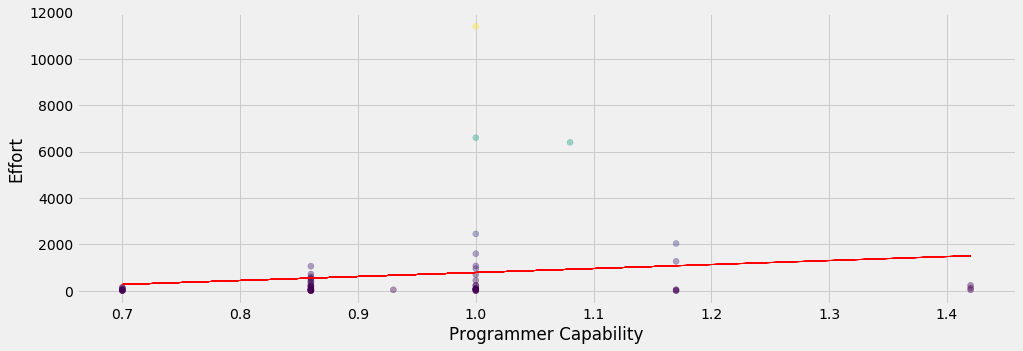

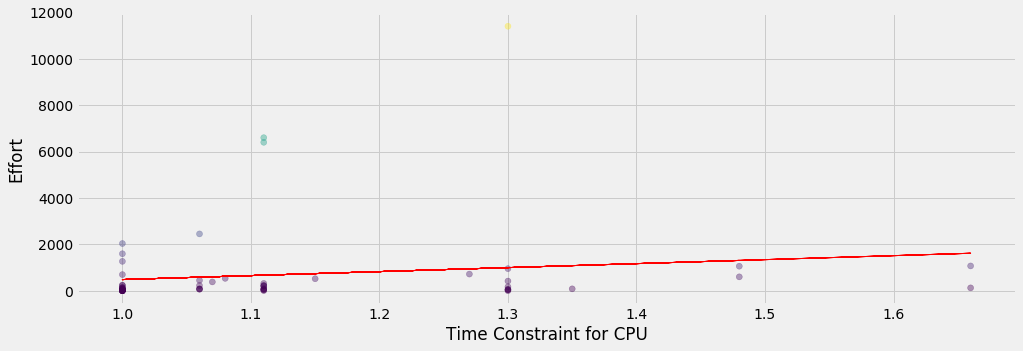

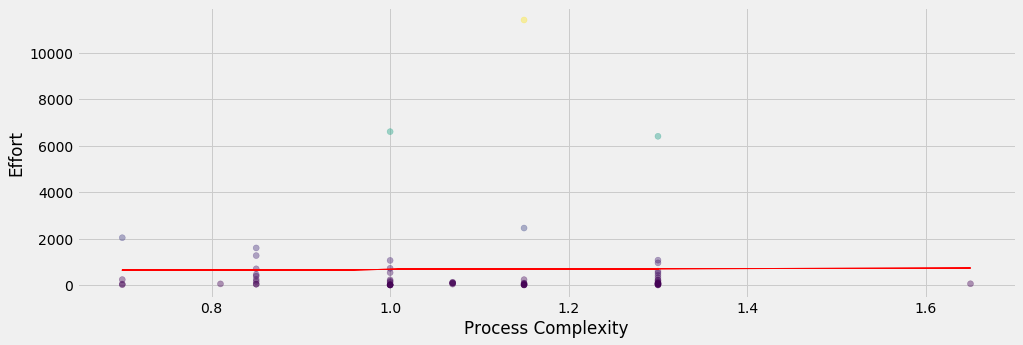

In [7]:
def show_corr(columnName, xlabel, ylabel):
    model = LinearRegression()
    column = df_cocomo81[columnName].values.reshape(-1,1)
    model.fit(column, df_cocomo81['actual'])
    predictions =  model.predict(column)
    plt.plot(column, predictions, color='red', linewidth=1)
    plt.scatter(column, df_cocomo81['actual'], alpha=0.4, c=df_cocomo81['actual'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
show_corr('pcap',"Programmer Capability",'Effort')
show_corr('time',"Time Constraint for CPU",'Effort')
show_corr('cplx',"Process Complexity",'Effort')